<a href="https://colab.research.google.com/github/rkti498/e_shikaku/blob/main/01_basic_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 01 基本的なネットワーク
### 順伝播、誤差逆伝播とパラメータ更新

sample_net01　順伝播　--　入力2、中間層3、出力1の順伝播（行列なし）  
sample_net02　順伝播　--　入力2、中間層3、出力1の順伝播（行列あり）  
sample_net03　回帰　2-3-1  
sample_net04　誤差逆伝播（バックプロパゲーション）とパラメータ更新の実装  


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### sample_net01　順伝播　--　入力2、中間層3、出力1の順伝播（行列なし）  

単純に順伝播を計算して値を出力するだけ。出力層で何もやっていない。
はじめに意図的に冗長に変数を一つずつ作成する

In [ ]:
seed = 88

In [ ]:
np.random.seed(seed=seed)

w1_11 = np.random.rand() * 0.1
w1_12 = np.random.rand() * 0.1
w1_13 = np.random.rand() * 0.1
w1_1b = np.random.rand() * 0.1
w1_21 = np.random.rand() * 0.1
w1_22 = np.random.rand() * 0.1
w1_23 = np.random.rand() * 0.1
w1_2b = np.random.rand() * 0.1
print(w1_11)
print(w1_12)
print(w1_13)
print(w1_1b)
print(w1_21)
print(w1_22)
print(w1_23)
print(w1_2b)

w2_1 = np.random.rand() * 0.1
w2_2 = np.random.rand() * 0.1
w2_3 = np.random.rand() * 0.1
w2_b = np.random.rand() * 0.1
print(w2_1)
print(w2_2)
print(w2_3)
print(w2_b)


0.06475510493530234
0.05071496882130802
0.05283413801522394
0.08962852040098879
0.0699991190667488
0.0714297101871135
0.07173383820914007
0.02228194621828611
0.017515452332402304
0.04568414883380811
0.09287384315385623
0.000988588704044846


In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def forward(inp1, inp2):
  # 入力層から中間層への線形変換
  u11 = inp1 * w1_11 + w1_1b
  u12 = inp1 * w1_12 + w1_1b
  u13 = inp1 * w1_13 + w1_1b
  u21 = inp2 * w1_21 + w1_2b
  u22 = inp2 * w1_22 + w1_2b
  u23 = inp2 * w1_23 + w1_2b

  # 合算
  u1 = u11 + u21
  u2 = u12 + u22
  u3 = u13 + u23

  # 活性化
  z1 = sigmoid(u1)
  z2 = sigmoid(u2)
  z3 = sigmoid(u3)

  # 中間層から出力層への線形変換
  o11 = z1 * w2_1 + w2_b
  o21 = z2 * w2_2 + w2_b
  o31 = z3 * w2_3 + w2_b

  # 合算
  y1 = o11 + o21 + o31

  return y1



In [ ]:
# sigmoidの確認
print(sigmoid(-10))
print(sigmoid(-1))
print(sigmoid(-0.5))
print(sigmoid(0))
print(sigmoid(0.5))
print(sigmoid(1))
print(sigmoid(10))

4.5397868702434395e-05
0.2689414213699951
0.3775406687981454
0.5
0.6224593312018546
0.7310585786300049
0.9999546021312976


In [ ]:


print(forward(0.5, 0.8))
print(forward(0.3, 0.8))
print(forward(0.1, 0.4))
print(forward(0.3, 1.8))
print(forward(2.8, 5.5))
print(forward(1.3, 0.5))
print(forward(1, 1))
print(forward(2, 4))
print(forward(5, 8))
print(forward(8, 3))
print(forward(12, 1))
print(forward(15, 3))
print(forward(8, 10))
print(forward(10, 30))
print(forward(20, 10))
print(forward(40, 35))


0.08861975734596922
0.08820563083434088
0.08668308220557812
0.09095949305037576
0.10567698039409074
0.08944609354161223
0.09020339178475359
0.10029142875559631
0.11555057321661244
0.10912023721493733
0.11149990043643107
0.12089209278467027
0.12440588415824992
0.1500127561099443
0.13864956295534872
0.15769389080344126


In [ ]:

# 出力用の関数
def print_vec(text, vec):
    print("*** " + text + " ***")
    print(vec)
    print("shape: " + str(vec.shape))

    print("")


def relu(x):
  """
  これだけでOK。numpyの関数をうまく使えば、このように大抵は１行で書ける。
  """
  return np.maximum(x, 0)

### sample_net02　順伝播　--　入力2、中間層3、出力1の順伝播（行列あり）  

単純に順伝播を計算して値を出力するだけ。これも出力層で何もやっていない。  
さっきは変数を冗長に個々に作成したが、今回はnumpy行列を使う  
（今後は常に行列あり）  

In [ ]:
# 順伝播（3層・複数ユニット）

# ウェイトとバイアスを設定
# ネートワークを作成
def init_network02():
    np.random.seed(seed=seed)

    print("##### ネットワークの初期化 #####")
    network = {}
    
    input_layer_size = 2
    hidden_layer_size_1 = 3
    # hidden_layer_size_2 = 5
    output_layer_size = 1
    
    #試してみよう
    #_各パラメータのshapeを表示
    #_ネットワークの初期値ランダム生成
    network['W1'] = np.random.rand(input_layer_size, hidden_layer_size_1)
    network['W2'] = np.random.rand(hidden_layer_size_1, output_layer_size)
    # network['W2'] = np.random.rand(hidden_layer_size_1,hidden_layer_size_2)
    # network['W3'] = np.random.rand(hidden_layer_size_2,output_layer_size)

    network['b1'] =  np.random.rand(hidden_layer_size_1)
    network['b2'] =  np.random.rand(output_layer_size)
    # network['b2'] =  np.random.rand(hidden_layer_size_2)
    # network['b3'] =  np.random.rand(output_layer_size)

    print_vec("重み1", network['W1'] )
    print_vec("重み2", network['W2'] )
    # print_vec("重み3", network['W3'] )
    print_vec("バイアス1", network['b1'] )
    print_vec("バイアス2", network['b2'] )
    # print_vec("バイアス3", network['b3'] )

    return network

# プロセスを作成
# x：入力値
def forward02(network, x):
    
    print("##### 順伝播開始 #####")

    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']

    # W1, W2, W3 = network['W1'], network['W2'], network['W3']
    # b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    # 1層の総入力
    u1 = np.dot(x, W1) + b1
    
    # 1層の総出力
    z1 = relu(u1)
    
    # # 2層の総入力
    # u2 = np.dot(z1, W2) + b2
    
    # # 2層の総出力
    # z2 = relu(u2)

    # # 出力層の総入力
    # u3 = np.dot(z2, W3) + b3
    
    # # 出力層の総出力
    # y = u3
    
    # 出力層の総入力
    u2 = np.dot(z1, W2) + b2
    
    # 出力層の総出力
    y = u2

    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    # print_vec("中間層出力2", z2)
    print_vec("総入力2", u2)
    print_vec("出力", y)
    print("出力合計: " + str(np.sum(y)))

    return y, z1

# 入力値
# x = np.array([1., 2., 4.])
x = np.array([1., 2.])
print_vec("入力", x)

# ネットワークの初期化
network =  init_network02()

y, z1 = forward02(network, x)

*** 入力 ***
[1. 2.]
shape: (2,)

##### ネットワークの初期化 #####
*** 重み1 ***
[[0.64755105 0.50714969 0.52834138]
 [0.8962852  0.69999119 0.7142971 ]]
shape: (2, 3)

*** 重み2 ***
[[0.71733838]
 [0.22281946]
 [0.17515452]]
shape: (3, 1)

*** バイアス1 ***
[0.45684149 0.92873843 0.00988589]
shape: (3,)

*** バイアス2 ***
[0.08992219]
shape: (1,)

##### 順伝播開始 #####
*** 総入力1 ***
[2.89696295 2.8358705  1.96682147]
shape: (3,)

*** 中間層出力1 ***
[2.89696295 2.8358705  1.96682147]
shape: (3,)

*** 総入力2 ***
[3.14440972]
shape: (1,)

*** 出力 ***
[3.14440972]
shape: (1,)

出力合計: 3.144409724216362


### sample_net03　回帰　2-3-1  

入力２、中間層1層（３個）、出力１で、平均２乗誤差の回帰を作成。

In [ ]:
def mean_squared_error(t, y):
  return np.mean((t - y) ** 2) / 2

In [ ]:
def d_mean_squared_error(t, y):
  if type(t) == np.ndarray:
    batch_size = t.shape[0]
    dx = (y - t) / batch_size
  else:
    dx = y - t
  return dx

      

In [ ]:
# 回帰
# 2-3-1ネットワーク

# ウェイトとバイアスを設定
# ネートワークを作成
def init_network03():
    np.random.seed(seed=seed)

    print("##### ネットワークの初期化 #####")

    input_layer_size = 2
    hidden_layer_size = 3
    output_layer_size = 1
    
    network['W1'] = np.random.rand(input_layer_size, hidden_layer_size)
    network['W2'] = np.random.rand(hidden_layer_size,output_layer_size)

    network['b1'] =  np.random.rand(hidden_layer_size)
    network['b2'] =  np.random.rand(output_layer_size)
    
    print_vec("重み1", network['W1'] )
    print_vec("重み2", network['W2'] )
    print_vec("バイアス1", network['b1'] )
    print_vec("バイアス2", network['b2'] )

    return network

# プロセスを作成
def forward03(network, x):
    print("##### 順伝播開始 #####")
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    # 隠れ層の総入力
    u1 = np.dot(x, W1) + b1
    # 隠れ層の総出力
    z1 = relu(u1)
    # 出力層の総入力
    u2 = np.dot(z1, W2) + b2
    # 出力層の総出力
    y = u2
    
    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", y)
    print("出力合計: " + str(np.sum(y)))
    
    return y, z1

# 入力値
x = np.array([1., 2.])
# x = np.array([1., 2., 3.])
network =  init_network03()
y, z1 = forward03(network, x)
# 目標出力
t = np.array([2.])
# t = np.array([2., 4.])
# 誤差
loss = mean_squared_error(t, y)

## 表示
print("\n##### 結果表示 #####")
print_vec("中間層出力", z1)
print_vec("出力", y)
print_vec("訓練データ", t)
print_vec("二乗誤差",  loss)

##### ネットワークの初期化 #####
*** 重み1 ***
[[0.64755105 0.50714969 0.52834138]
 [0.8962852  0.69999119 0.7142971 ]]
shape: (2, 3)

*** 重み2 ***
[[0.71733838]
 [0.22281946]
 [0.17515452]]
shape: (3, 1)

*** バイアス1 ***
[0.45684149 0.92873843 0.00988589]
shape: (3,)

*** バイアス2 ***
[0.08992219]
shape: (1,)

##### 順伝播開始 #####
*** 総入力1 ***
[2.89696295 2.8358705  1.96682147]
shape: (3,)

*** 中間層出力1 ***
[2.89696295 2.8358705  1.96682147]
shape: (3,)

*** 総入力2 ***
[3.14440972]
shape: (1,)

*** 出力1 ***
[3.14440972]
shape: (1,)

出力合計: 3.144409724216362

##### 結果表示 #####
*** 中間層出力 ***
[2.89696295 2.8358705  1.96682147]
shape: (3,)

*** 出力 ***
[3.14440972]
shape: (1,)

*** 訓練データ ***
[2.]
shape: (1,)

*** 二乗誤差 ***
0.6548368084404849
shape: ()



### 順伝播時の行列サイズの確認



#### 入力層から中間層へ

$$
  \begin{pmatrix}
    x_1 \quad x_2 \\
  \end{pmatrix}
  \cdot
  \begin{bmatrix}
    w_{11} \quad w_{12} \quad w_{13} \\
    w_{21} \quad w_{22} \quad w_{23} \\
  \end{bmatrix}
  \quad
  +
  \quad
  \begin{pmatrix}
    b_1 \quad b_2 \quad b_3
  \end{pmatrix}
  \quad
  =
  \quad
  \begin{pmatrix}
    u_1 \quad u_2 \quad u_3
  \end{pmatrix}
$$

まず、(1x2)・(2x3)の積なので、(1x3)のベクトルとなり、  
1x3のバイアス（同じシェイプ）を加算する。  
スカラーの式で表すとこうなる。

$$
x_1 * w_{11} \quad + \quad x_2 * w_{21} \quad + \quad b1_1 \quad = \quad u_1 \\  
x_1 * w_{12} \quad + \quad x_2 * w_{22} \quad + \quad b1_2 \quad = \quad u_2 \\
x_1 * w_{13} \quad + \quad x_2 * w_{23} \quad + \quad b1_3 \quad = \quad u_3 \\
$$

行列の積では、「掛けて足す掛けて足す・・・」を自動でやってくれる。  
その演算結果それぞれに対してバイアスを足す、というイメージ  


### 中間層から出力層へ

$$
  \begin{pmatrix}
    z_1 \quad z_2 \quad z_3
  \end{pmatrix}
  \cdot
  \begin{bmatrix}
    w_{21} \\
    w_{22} \\
    w_{23}
  \end{bmatrix}
  \quad 
  +
  \quad 
  \begin{pmatrix}
    b2
  \end{pmatrix}
  \quad 
  =
  \quad 
  \begin{pmatrix}
    u2
  \end{pmatrix}
$$

出力層が１個しかないので、バイアスも１個。





#### 順伝播ここまで

### 誤差逆伝播（バックプロパゲーション）とパラメータ更新の実装
### sample_net04
sample_net03と講義のサンプルコードをもとにしてbackwardとSDGを実装する。



In [ ]:
def f(xt):
    # xt = x.T
    y = 3 * xt[0] + 2 * xt[1]
    return y

In [ ]:
# ReLU関数の導関数
def d_relu(x):
    return np.where( x > 0, 1, 0)

In [ ]:
# 回帰
# 2-3-1ネットワーク

# ウェイトとバイアスを設定
# ネートワークを作成
def init_network04():
    np.random.seed(seed=seed)

    print("##### ネットワークの初期化 #####")

    network = {}

    input_layer_size = 2
    hidden_layer_size = 10
    output_layer_size = 1

    network['W1'] = np.random.randn(input_layer_size, hidden_layer_size)
    network['W2'] = np.random.randn(hidden_layer_size)
    network['b1'] = np.random.randn(hidden_layer_size)
    network['b2'] = np.random.randn()


    # この重みで初期化すると勾配爆発が起きる
    # network['W1'] = np.random.rand(input_layer_size, hidden_layer_size)
    # network['W2'] = np.random.rand(hidden_layer_size, output_layer_size)
    # network['b1'] =  np.random.rand(hidden_layer_size)
    # network['b2'] =  np.random.rand(output_layer_size)

    # print_vec("重み1", network['W1'] )
    # print_vec("重み2", network['W2'] )
    # print_vec("バイアス1", network['b1'] )
    # print("バイアス2", network['b2'] )

    return network

# プロセスを作成
def forward04(network, x):
    # print("##### 順伝播開始 #####")
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    # 隠れ層の総入力
    u1 = np.dot(x, W1) + b1
    # 隠れ層の総出力
    z1 = relu(u1)
    # 出力層の総入力
    u2 = np.dot(z1, W2) + b2
    # 出力層の総出力
    y = u2
    
    # print_vec("総入力1", u1)
    # print_vec("中間層出力1", z1)
    # print_vec("総入力2", u2)
    # print_vec("出力1", y)
    # print("出力合計: " + str(np.sum(y)))
    
    return z1, y

def backward04(x, t, z1, y):

    # print("\n##### 誤差逆伝播開始 #####")

    grad = {}

    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    
    # 中間～出力層の更新
    delta2 = d_mean_squared_error(t, y)
    # b2の勾配
    # z1 * w2 + b2 を b2 で微分すると 1 になるのでデルタそのまま(合算)
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    # z1 * w2 + b2 を w2 で微分すると z1 なのでデルタ * z1
    grad['W2'] = np.dot(z1.T, delta2)
    
    # 中間層でのデルタ
    # d_reluは、0以上なら1、0以下なら0を返す
    delta1 = np.dot(delta2, W2.T) * d_relu(z1)

    # これは何をやっている？
    delta1 = delta1[np.newaxis, :]
    
    # 入力層～中間層の更新
    # b1の勾配
    # x * w1 + b1 を b1 で微分すると 1 になるのでデルタそのまま(合算)
    grad['b1'] = np.sum(delta1, axis=0)
    x = x[np.newaxis, :]
    #  W1の勾配
    # x * w1 + b1 を w1 で微分すると x なので デルタ * x
    grad['W1'] = np.dot(x.T, delta1)

    # print_vec("偏微分_dE/du2", delta2)
    # print_vec("偏微分_dE/du2", delta1)

    # print_vec("偏微分_重み1", grad["W1"])
    # print_vec("偏微分_重み2", grad["W2"])
    # print_vec("偏微分_バイアス1", grad["b1"])
    # print_vec("偏微分_バイアス2", grad["b2"])

    return grad


### f(x)を予測するモデルを学習

##### ネットワークの初期化 #####
loss: 2.6170560324444336
loss: 4.872089240300031e-08
loss: 9.908195209494343e-07
loss: 2.2606613934649646e-06
loss: 0.002222821367747458
loss: 0.0008937094397563183
loss: 4.098742549472665e-06
loss: 1.7503430640810553e-07
loss: 0.0003713050208974452
loss: 1.0145516146978898e-07
##### 結果表示 #####


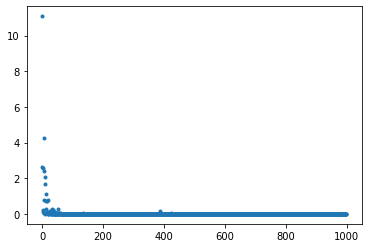

In [ ]:
# サンプルデータを作成
data_sets_size = 100000
# data_sets_size = 1000
# data_sets_size = 100
data_sets = [0 for i in range(data_sets_size)]

for i in range(data_sets_size):
    data_sets[i] = {}

    # ランダムな値を設定
    # data_sets[i]['x'] = np.random.rand(2) * 10 - 5
    data_sets[i]['x'] = np.random.rand(2)
    # print(data_sets[i]['x'])
        
    # 目標出力を設定
    data_sets[i]['t'] = f(data_sets[i]['x'])

losses = []

# 学習率
learning_rate = 0.07

# 抽出数
epoch = 1000
# epoch = 100
# epoch = 10


# パラメータの初期化
network04 = init_network04()
# データのランダム抽出
random_datasets = np.random.choice(data_sets, epoch)


# 勾配降下の繰り返し
for i, dataset in enumerate(random_datasets):
    x, t = dataset['x'], dataset['t']
    z1, y = forward04(network04, x)
    grad = backward04(x, t, z1, y)
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'b1', 'b2'):
        network04[key]  -= learning_rate * grad[key]

    # 誤差
    loss = mean_squared_error(t, y)
    losses.append(loss)

    if i % 100 == 0:
      print("loss:", loss)

print("##### 結果表示 #####")    
lists = range(epoch)

plt.plot(lists, losses, '.')
# グラフの表示
plt.show()

## ここまでの考察

### いろいろ試して結局、サンプルと同じように作ってやっと学習が収束した。
重みやデータを適当に初期化してもうまくいかず、勾配爆発を起こしてしまう。


うまくいったときの収束具合(100回に一回出力）
##### #### ネットワークの初期化 #####  
loss: 2.6170560324444336  
loss: 4.872089240300031e-08  
loss: 9.908195209494343e-07  
loss: 2.2606613934649646e-06  
loss: 0.002222821367747458  
loss: 0.0008937094397563183  
loss: 4.098742549472665e-06  
loss: 1.7503430640810553e-07  
loss: 0.0003713050208974452  
loss: 1.0145516146978898e-07  
##### #### 結果表示 #####  
これでもまだ安定している方で、入力の幅を大きくしたり、重みの初期化をすこしずらすと急速に勾配爆発が起きる。


